<a href="https://colab.research.google.com/github/pejmanrasti/traitement_des_signaux_M1/blob/main/1_Fourier_Series_Temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fourier Series of Temperature Variations**
In this notebook, we will analyze real-world temperature data using Fourier series. By decomposing the temperature into different harmonics, we can see how various frequencies contribute to the overall behavior of the data.

In [1]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy.constants import pi
from IPython.display import display
from ipywidgets import interact

### **Simulated Temperature Data**
We will simulate temperature data over a year, represented as a periodic signal with seasonal variations.

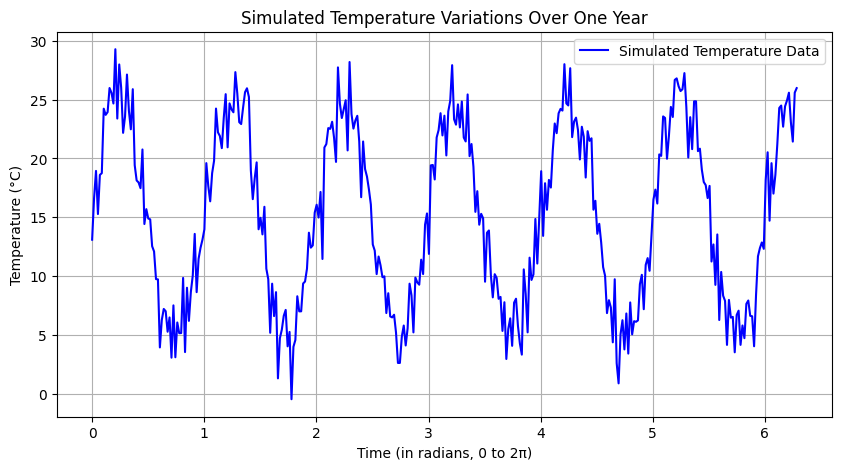

In [2]:
# Simulating temperature data
days = 365
t = np.linspace(0, 2 * np.pi, days)
mean_temp = 15
amplitude_temp = 10
temperature = mean_temp + amplitude_temp * np.sin(2 * np.pi * t) + np.random.normal(0, 2, days)

# Plot the original temperature data
plt.figure(figsize=(10, 5))
plt.plot(t, temperature, label='Simulated Temperature Data', color='blue')
plt.title('Simulated Temperature Variations Over One Year')
plt.xlabel('Time (in radians, 0 to 2π)')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.show()

### **Fourier Series Decomposition**
Now, we will use Fourier series to decompose the temperature data into different harmonics.

In [3]:
# Define Fourier series decomposition function
def fourier_series(t, signal, N):
    T = 2 * np.pi  # Period (2π for one year)
    a0 = (2 / T) * np.trapz(signal, t)
    an = np.zeros(N)
    bn = np.zeros(N)
    for n in range(1, N + 1):
        an[n-1] = (2 / T) * np.trapz(signal * np.cos(n * t), t)
        bn[n-1] = (2 / T) * np.trapz(signal * np.sin(n * t), t)
    reconstructed_signal = a0 / 2
    for n in range(1, N + 1):
        reconstructed_signal += an[n-1] * np.cos(n * t) + bn[n-1] * np.sin(n * t)
    return reconstructed_signal, a0, an, bn

### **Interactive Plotting**
Use the slider below to adjust the number of Fourier harmonics used in the decomposition. The more harmonics you include, the better the approximation.

In [4]:
# Slider for adjusting the number of Fourier terms
N_slider = widgets.IntSlider(value=5, min=1, max=50, step=1, description='Harmonics (N):')

# Interactive function for Fourier series decomposition
def plot_fourier_series(N):
    reconstructed_signal, a0, an, bn = fourier_series(t, temperature, N)
    plt.figure(figsize=(10, 5))
    plt.plot(t, temperature, label='Original Signal', color='blue', alpha=0.5)
    plt.plot(t, reconstructed_signal, label=f'Fourier Series (N={N})', color='red')
    plt.title(f'Fourier Series Decomposition of Temperature Data with N={N}')
    plt.xlabel('Time (in radians, 0 to 2π)')
    plt.ylabel('Temperature (°C)')
    plt.grid(True)
    plt.legend()
    plt.show()

interact(plot_fourier_series, N=N_slider)

interactive(children=(IntSlider(value=5, description='Harmonics (N):', max=50, min=1), Output()), _dom_classes…

<function __main__.plot_fourier_series(N)>